In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

from sklearn.datasets import load_wine

In [8]:
wine = load_wine()

In [13]:
df = pd.DataFrame(wine.data,columns=wine.feature_names)
df['Target'] = wine.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [15]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [17]:
len(df.columns)

14

In [21]:
df[df.Target==0][0:5]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


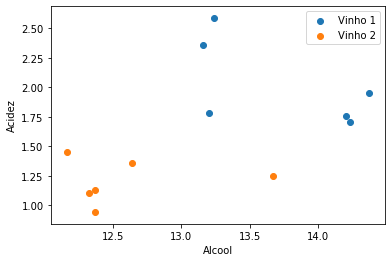

In [36]:
plt.xlabel('Alcool')
plt.ylabel('Acidez')

plt.scatter(df[df.Target==0][0:6]['alcohol'],df[df.Target==0][0:6]['malic_acid'],label='Vinho 1')
plt.scatter(df[df.Target==1][0:6]['alcohol'],df[df.Target==1][0:6]['malic_acid'],label='Vinho 2')

plt.legend()

In [33]:
cols=['alcohol', 'malic_acid','Target']

In [35]:
data = df[df.Target==0][0:6].append(df[df.Target==1][0:6])
data = data[cols]
data

,alcohol,malic_acid,Target
0,14.23,1.71,0
1,13.20,1.78,0
2,13.16,2.36,0
3,14.37,1.95,0
4,13.24,2.59,0
5,14.20,1.76,0
59,12.37,0.94,1
60,12.33,1.10,1
61,12.64,1.36,1
62,13.67,1.25,1


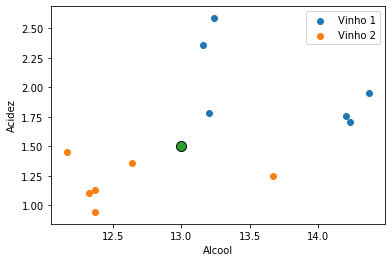

In [40]:
plt.xlabel('Alcool')
plt.ylabel('Acidez')

plt.scatter(data[data.Target==0]['alcohol'],data[data.Target==0]['malic_acid'],label='Vinho 1')
plt.scatter(data[data.Target==1]['alcohol'],data[data.Target==1]['malic_acid'],label='Vinho 2')
plt.scatter(13,1.5,edgecolor='black',s=100)


plt.legend()

In [ ]:
plt.xlabel('Alcool')
plt.ylabel('Acidez')

plt.scatter(data[data.Target==0]['alcohol'],data[data.Target==0]['malic_acid'],label='Vinho 1')
plt.scatter(data[data.Target==1]['alcohol'],data[data.Target==1]['malic_acid'],label='Vinho 2')
plt.scatter(13,1.5,edgecolor='black',s=100)


plt.legend()

In [47]:
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import euclidean

In [58]:
dist = []
for i in range(0,len(data)):
    dist.append(euclidean(data[data.columns[:2]].iloc[i],[13,1.5]))
data['distancia'] = dist

In [68]:
idx = np.argmin(data.distancia)

In [61]:
data['alcohol_norm'] = (data.alcohol-data.alcohol.mean())/data.alcohol.std()
data['malic_acid_norm'] = (data.malic_acid-data.malic_acid.mean())/data.malic_acid.std()
data

,alcohol,malic_acid,Target,distancia,alcohol_norm,malic_acid_norm
0,14.23,1.71,0,1.247798,1.324420,0.186418
1,13.20,1.78,0,0.344093,0.046525,0.323778
2,13.16,2.36,0,0.874757,-0.003102,1.461909
3,14.37,1.95,0,1.442012,1.498115,0.657368
4,13.24,2.59,0,1.116109,0.096152,1.913236
5,14.20,1.76,0,1.227844,1.287200,0.284533
59,12.37,0.94,1,0.842912,-0.983235,-1.324548
60,12.33,1.10,1,0.780320,-1.032862,-1.010581
61,12.64,1.36,1,0.386264,-0.648253,-0.500385
62,13.67,1.25,1,0.715122,0.629643,-0.716237


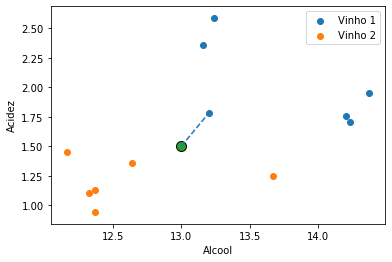

In [70]:
plt.xlabel('Alcool')
plt.ylabel('Acidez')

plt.scatter(data[data.Target==0]['alcohol'],data[data.Target==0]['malic_acid'],label='Vinho 1')
plt.scatter(data[data.Target==1]['alcohol'],data[data.Target==1]['malic_acid'],label='Vinho 2')
plt.scatter(13,1.5,edgecolor='black',s=100)

plt.plot([13,data.alcohol.iloc[idx]],[1.5,data.malic_acid.iloc[idx]],ls='--')

plt.legend()

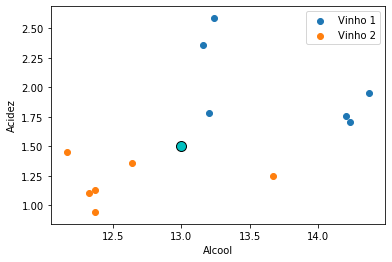

In [73]:
plt.xlabel('Alcool')
plt.ylabel('Acidez')

plt.scatter(data[data.Target==0]['alcohol'],data[data.Target==0]['malic_acid'],label='Vinho 1')
plt.scatter(data[data.Target==1]['alcohol'],data[data.Target==1]['malic_acid'],label='Vinho 2')
plt.scatter(13,1.5,edgecolor='black',s=100,color='c')

#plt.plot([13,data.alcohol.iloc[idx]],[1.5,data.malic_acid.iloc[idx]],ls='--')

plt.legend()

In [63]:
x_alc_norm = (13-data.alcohol.mean())/data.alcohol.std()
x_acid_norm = (1.5-data.malic_acid.mean())/data.malic_acid.std()

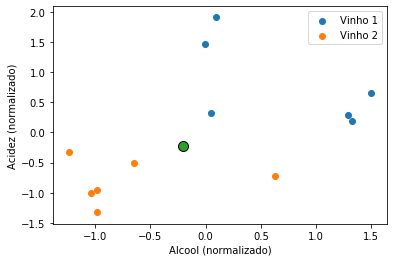

In [90]:
plt.xlabel('Alcool (normalizado)')
plt.ylabel('Acidez (normalizado)')

plt.scatter(data[data.Target==0]['alcohol_norm'],data[data.Target==0]['malic_acid_norm'],label='Vinho 1')
plt.scatter(data[data.Target==1]['alcohol_norm'],data[data.Target==1]['malic_acid_norm'],label='Vinho 2')

plt.scatter(x_alc_norm,x_acid_norm,edgecolor='black',s=100)

plt.legend()

In [91]:
print(x_alc_norm,x_acid_norm)

-0.2016096728681894 -0.2256637836299882


In [74]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'Target'],
      dtype='object')

In [82]:
data[['alcohol_norm', 'malic_acid_norm']].iloc[i]

alcohol_norm      -1.231370
malic_acid_norm   -0.323778
Name: 64, dtype: float64

In [85]:
dist_norm

[]

In [86]:
euclidean(data[['alcohol_norm', 'malic_acid_norm']].iloc[i].values,[x_alc_norm,x_acid_norm])

1.0344237577842674

In [87]:
dist_norm = []
for i in range(0,len(data)):
    dist_norm.append(euclidean(data[['alcohol_norm', 'malic_acid_norm']].iloc[i].values,[x_alc_norm,x_acid_norm]))
data['distancia_norm'] = dist_norm

In [92]:
data

,alcohol,malic_acid,Target,distancia,alcohol_norm,malic_acid_norm,distancia_norm
0,14.23,1.71,0,1.247798,1.324420,0.186418,1.580690
1,13.20,1.78,0,0.344093,0.046525,0.323778,0.602875
2,13.16,2.36,0,0.874757,-0.003102,1.461909,1.699208
3,14.37,1.95,0,1.442012,1.498115,0.657368,1.915414
4,13.24,2.59,0,1.116109,0.096152,1.913236,2.159527
5,14.20,1.76,0,1.227844,1.287200,0.284533,1.573803
59,12.37,0.94,1,0.842912,-0.983235,-1.324548,1.348512
60,12.33,1.10,1,0.780320,-1.032862,-1.010581,1.143274
61,12.64,1.36,1,0.386264,-0.648253,-0.500385,0.524368
62,13.67,1.25,1,0.715122,0.629643,-0.716237,0.965216


In [95]:
np.argsort(data.distancia_norm)

0      8
1      1
2      9
3     11
4     10
5      7
59     6
60     5
61     0
62     2
63     3
64     4
Name: distancia_norm, dtype: int64

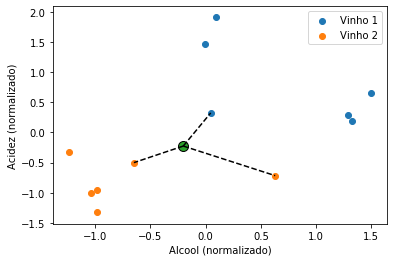

In [99]:
plt.xlabel('Alcool (normalizado)')
plt.ylabel('Acidez (normalizado)')

plt.scatter(data[data.Target==0]['alcohol_norm'],data[data.Target==0]['malic_acid_norm'],label='Vinho 1')
plt.scatter(data[data.Target==1]['alcohol_norm'],data[data.Target==1]['malic_acid_norm'],label='Vinho 2')

plt.scatter(x_alc_norm,x_acid_norm,edgecolor='black',s=100)

plt.plot([x_alc_norm,data.alcohol_norm.iloc[8]],
         [x_acid_norm,data.malic_acid_norm.iloc[8]],ls='--',c='black')

plt.plot([x_alc_norm,data.alcohol_norm.iloc[1]],
         [x_acid_norm,data.malic_acid_norm.iloc[1]],ls='--',c='black')

plt.plot([x_alc_norm,data.alcohol_norm.iloc[9]],
         [x_acid_norm,data.malic_acid_norm.iloc[9]],ls='--',c='black')



plt.legend()

In [ ]:
data['malic_acid_norm'] = (data.malic_acid-data.malic_acid.mean())/data.malic_acid.std()

In [19]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [18]:
df.Target.unique()

array([0, 1, 2])

In [5]:
gr = np.asarray([15,10,17,25,35,45,37,28])
rild =np.log(np.asarray([105,110,95,80,60,30,52,75]))
df = pd.DataFrame({'Raios_Gama':gr,'Log_Resistividade':rild})
df

,Raios_Gama,Log_Resistividade
0,15,4.653960
1,10,4.700480
2,17,4.553877
3,25,4.382027
4,35,4.094345
5,45,3.401197
6,37,3.951244
7,28,4.317488


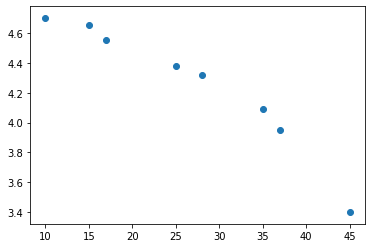

In [6]:
plt.scatter(df.Raios_Gama,df.Log_Resistividade)